<a href="https://colab.research.google.com/github/andyra42/financial-machine-learning/blob/master/sentiment_analyzer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlopen, Request

In [3]:
pip install inline

  Created wheel for inline: filename=inline-0.0.1-cp36-none-any.whl size=3314 sha256=d5f830e3cf0efac6df5ddc688f61d99812c0d59ddc6f58c11bfc3091dddde320
  Stored in directory: /root/.cache/pip/wheels/3d/22/5a/3cd6585c9bfa846bd65da2d3555464151af10cafa949f82b92
Successfully built inline


In [4]:
import inline as inline
import matplotlib
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [7]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [8]:
finwiz_url = 'https://finviz.com/quote.ashx?t='

In [9]:

news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG']

In [10]:
for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url, headers={'user-agent': 'my-app/0.0.1'})
    response = urlopen(req)
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [11]:
# Read one single day of headlines for 'AMZN'
amzn = news_tables['AMZN']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
amzn_tr = amzn.findAll('tr')

In [12]:
for i, table_row in enumerate(amzn_tr):
    # Read the text of the element 'a' into 'link_text'
    a_text = table_row.a.text
    # Read the text of the element 'td' into 'data_text'
    td_text = table_row.td.text
    # Print the contents of 'link_text' and 'data_text'
    print(a_text)
    print(td_text)
    # Exit after printing 4 rows of data
    if i == 3:
        break
parsed_news = []

Stocks That Would Have Made You Rich Today
Oct-10-20 03:00PM  
3 Top Tech Stocks to Buy Right Now
12:06PM  
Is Arlo Leaving the Home Security Field to Amazon and Google?
11:30AM  
4 Reasons Levi's New Online Secondhand Store Is Genius
10:08AM  


In [13]:
# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text()
        # splite text in the td tag into a list
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]

        # else load 'date' as the 1st element and 'time' as the second
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'
        ticker = file_name.split('_')[0]

        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])

In [14]:
print(parsed_news)

[['AMZN', 'Oct-10-20', '03:00PM', 'Stocks That Would Have Made You Rich Today'], ['AMZN', 'Oct-10-20', '12:06PM', '3 Top Tech Stocks to Buy Right Now'], ['AMZN', 'Oct-10-20', '11:30AM', 'Is Arlo Leaving the Home Security Field to Amazon and Google?'], ['AMZN', 'Oct-10-20', '10:08AM', "4 Reasons Levi's New Online Secondhand Store Is Genius"], ['AMZN', 'Oct-10-20', '10:02AM', '2 Important Investing Tips From Peter Lynch'], ['AMZN', 'Oct-10-20', '08:10AM', 'Forget Snowflake, These 3 Tech Stocks Are Better Buys Right Now'], ['AMZN', 'Oct-10-20', '07:30AM', 'Leave Amazon out of Big Tech regulation  it doesnt have a monopoly'], ['AMZN', 'Oct-10-20', '07:25AM', 'Ignore Uber, These 3 Stocks Are Better Buys'], ['AMZN', 'Oct-10-20', '07:05AM', '5 Hot Stocks That Will Get Even Hotter Next Week'], ['AMZN', 'Oct-09-20', '07:46PM', 'Browns Returns Beat the Big Boys of the Ivy League'], ['AMZN', 'Oct-09-20', '06:36PM', 'Amazon Looks Like a Holiday Season Winner, Says Analyst'], ['AMZN', 'Oct-09-20', 

  ticker        date     time  ...    neu    pos  compound
0   AMZN  2020-10-10  03:00PM  ...  0.660  0.340    0.5574
1   AMZN  2020-10-10  12:06PM  ...  0.769  0.231    0.2023
2   AMZN  2020-10-10  11:30AM  ...  0.687  0.313    0.4767
3   AMZN  2020-10-10  10:08AM  ...  1.000  0.000    0.0000
4   AMZN  2020-10-10  10:02AM  ...  0.735  0.265    0.2023

[5 rows x 8 columns]


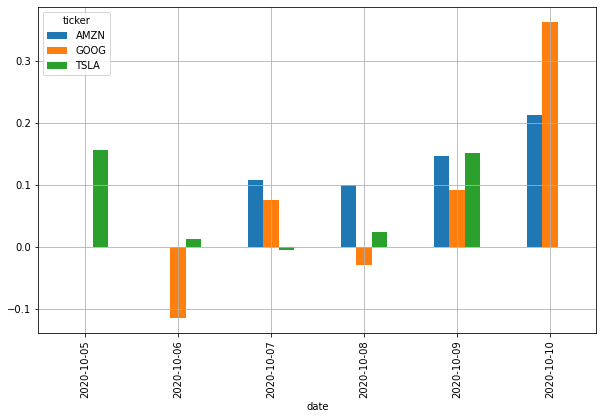

In [15]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

print(parsed_and_scored_news.head())

plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker', 'date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind='bar')
plt.grid()
